<a href="https://colab.research.google.com/github/laiyti/-/blob/main/Python_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import scipy.stats as stats
import pandas as pd
import numpy as np
from geopy.distance import great_circle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
# Loading the dataset
file_path = 'uber.csv'
uber_data = pd.read_csv('/content/drive/MyDrive/uber.csv', index_col = [0])

# Filtering out latitude and longitude that fall within valid ranges
uber_data = uber_data[(uber_data['pickup_latitude'].between(-90, 90)) &
                      (uber_data['pickup_longitude'].between(-180, 180)) &
                      (uber_data['dropoff_latitude'].between(-90, 90)) &
                      (uber_data['dropoff_longitude'].between(-180, 180))]

In [ ]:
# Defining a function to calculate distance between two points using great-circle distance
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(pickup, dropoff).kilometers

In [ ]:
# Cleaning data and creating a new column 'distance' for the DataFrame
uber_data = uber_data.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])
uber_data['distance'] = uber_data.apply(calculate_distance, axis=1)
uber_data = uber_data[uber_data['distance'] > 0]

          fare_amount  distance
24238194          7.5  1.683325
27835199          7.7  2.457593
44984355         12.9  5.036384
25894730          5.3  1.661686
17610152         16.0  4.475456


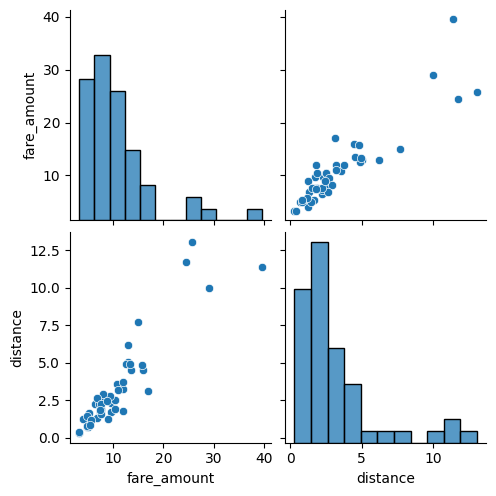

In [ ]:
#print(uber_data.head())
#plt.figure(figsize=(10, 6))
#plt.bar(uber_data['fare_amount'], uber_data['distance'])
#plt.show()
#plt.scatter(uber_data['fare_amount'], uber_data['distance'])
#plt.show()
#plt.pairplot
dt1 = uber_data.loc[:, ['fare_amount','distance']]
print(dt1.head())
sns.pairplot(dt1[:50])
plt.show()

In [ ]:
# Selecting the relevant features for the final dataset
uber_final = uber_data[['fare_amount', 'distance', 'passenger_count']]

In [ ]:
# Defining features (predictors) and target variable for regression analysis
X = uber_data[['distance', 'passenger_count']]
y = uber_data['fare_amount']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defining multiple regression models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Training and evaluating the performance of each regression model
def train_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - MSE: {mse}, R-squared: {r2}")

train_evaluate(models, X_train, X_test, y_train, y_test)

Linear Regression - MSE: 99.71359512606982, R-squared: 0.0008804056040372377
Ridge Regression - MSE: 99.71359509817682, R-squared: 0.0008804058835220063
Lasso Regression - MSE: 99.71832986486415, R-squared: 0.0008329640260079652
Decision Tree - MSE: 46.32901789687543, R-squared: 0.5357881790204598
Gradient Boosting - MSE: 26.149452245204692, R-squared: 0.7379852758505662


In [ ]:
# Calculating feature importance for Gradient Boosting model and displaying it numerically
if 'Gradient Boosting' in models:
    model = models['Gradient Boosting']
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_
    importance_scores = sorted(zip(X.columns, feature_importance), key=lambda x: x[1], reverse=True)
    for feature, importance in importance_scores:
        print(f"{feature}: {importance}")

distance: 0.9992181421048569
passenger_count: 0.0007818578951430819


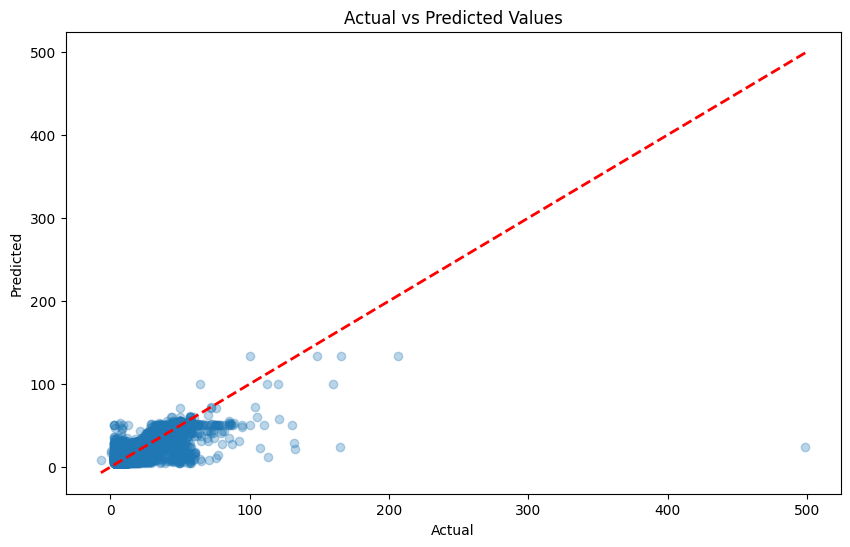

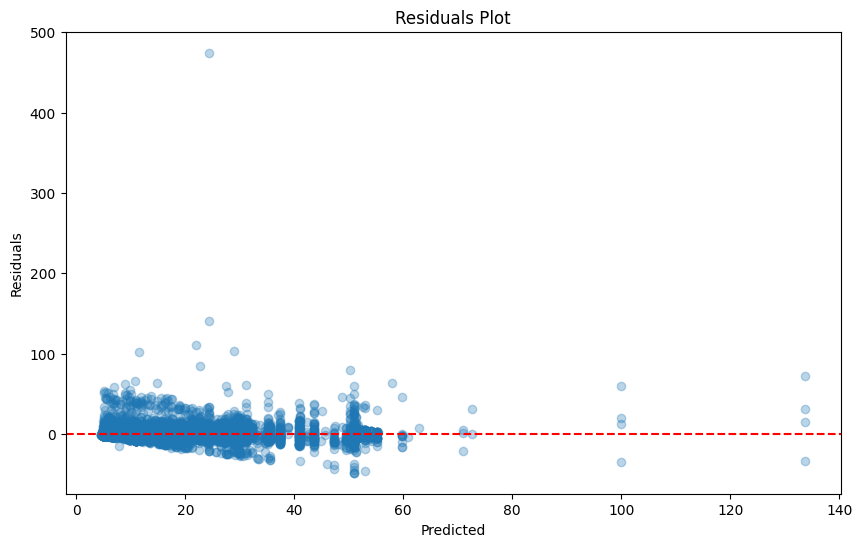

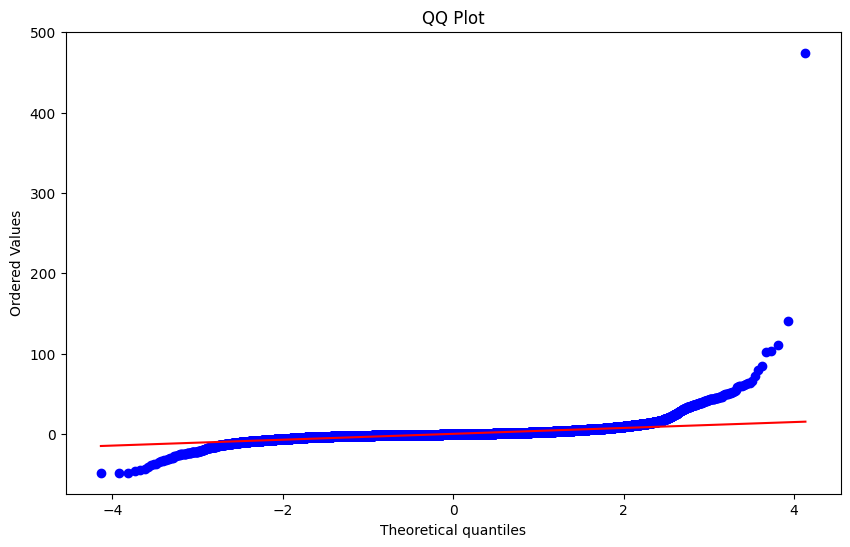

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# QQ Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


In [ ]:
def get_user_input():
    # Collecting input from the user
    try:
        distance = float(input("Enter the distance of the trip in kilometers: "))
        passenger_count = int(input("Enter the number of passengers: "))
        return distance, passenger_count
    except ValueError:
        print("Invalid input. Please enter numerical values only.")
        return None, None

def make_prediction(model, distance, passenger_count):

    input_data = pd.DataFrame([[distance, passenger_count]], columns=['distance', 'passenger_count'])

    predicted_fare = model.predict(input_data)
    return predicted_fare[0]

# Assuming you are using the Gradient Boosting model
model = models['Gradient Boosting']
model.fit(X_train, y_train)

# Get user input
distance, passenger_count = get_user_input()

if distance is not None and passenger_count is not None:
    # Make prediction
    predicted_fare = make_prediction(model, distance, passenger_count)
    # Output the prediction
    print(f"The predicted fare amount is: ${predicted_fare:.2f}")
else:
    print("Failed to get valid input.")


Enter the distance of the trip in kilometers: 12
Enter the number of passengers: 5
The predicted fare amount is: $30.09
